# Heart Disease Prediction using Machine Learning


Predicting and diagnosing heart disease is the biggest challenge in the medical industry and relies on factors such as the physical examination, symptoms and signs of the patient.

Heart disease can be predicted based on various symptoms such as age, gender, heart rate, etc. and reduces the death rate of heart patients.

Due to the increasing use of technology and data collection, we can now predict heart disease using machine learning algorithms. Now let’s go further with the task of heart disease prediction using machine learning with Python.

In [104]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [105]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

EDA helps us find answers to some important questions such as: What question (s) are you trying to solve? What kind of data do we have and how do we handle the different types? What is missing in the data and how do you deal with it? Where are the outliers and why should you care? How can you add, change, or remove features to get the most out of your data?

In [106]:
df.shape

(303, 14)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


no null values present in the dataset so need to do data cleaning

In [108]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Classification of People with Heart Disease')

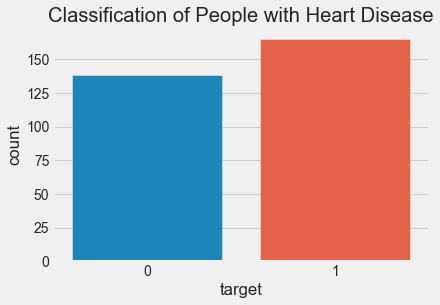

In [109]:
sns.countplot(data=df,x='target')
plt.title('Classification of People with Heart Disease')

We have 165(1) people with heart disease and 138(0) people without heart disease, so our problem is balanced.


In [110]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

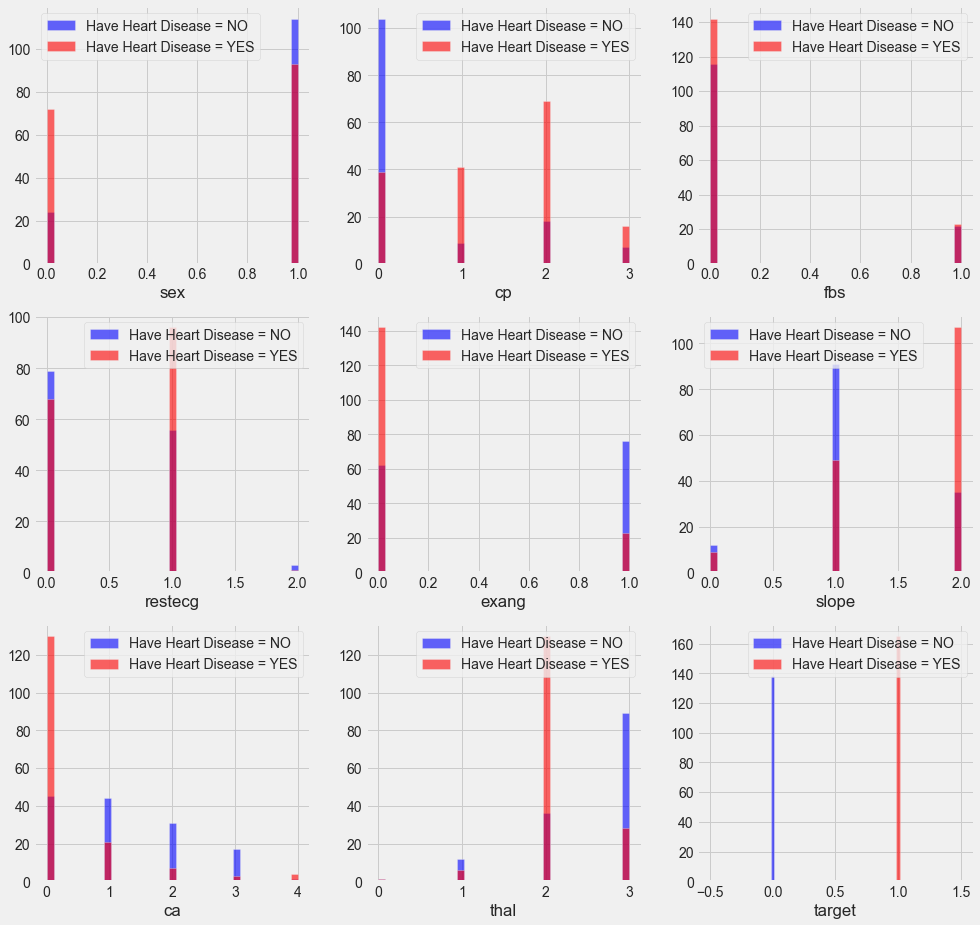

In [111]:
# graphs for categorical values
plt.figure(figsize=(15,15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

cp {Chest pain}:  People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.


exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)


slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).


ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.


thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.


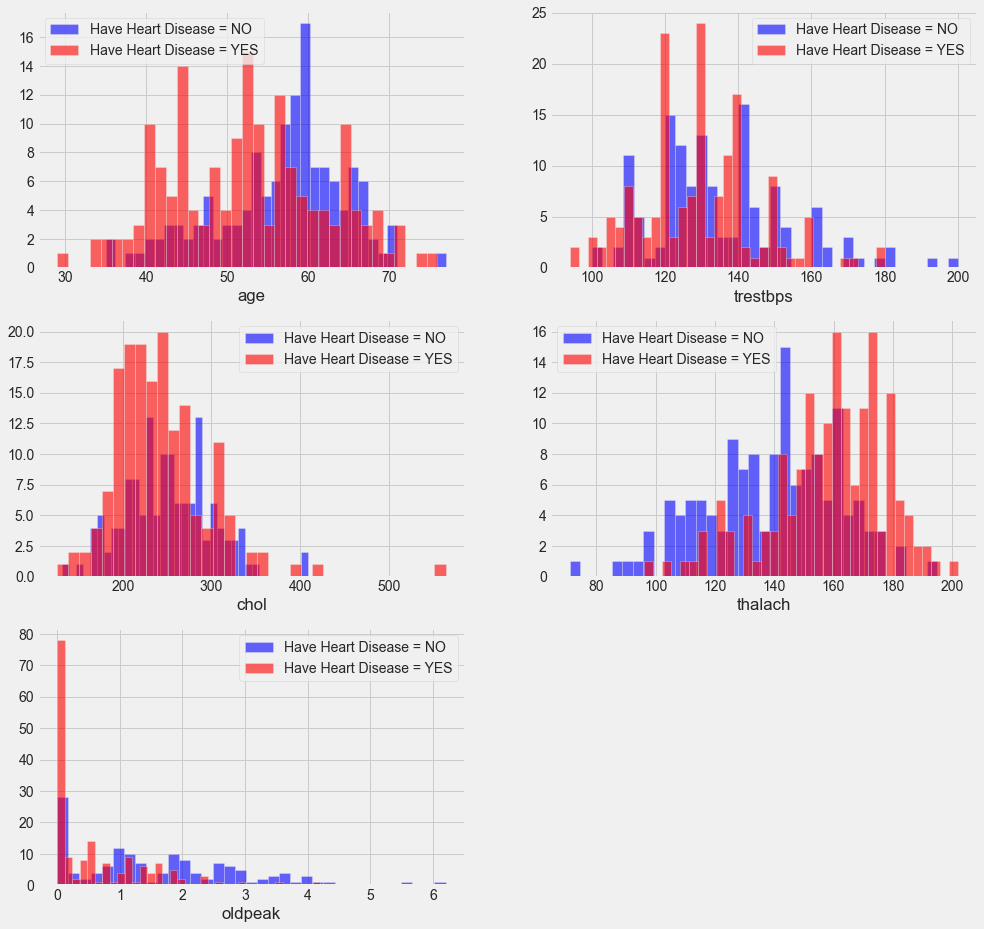

In [112]:
# graphs for continous values
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

restbps: resting blood pressure anything above 130-140 is generally of concern

chol: greater than 200 is of concern.

thalach: People with a maximum of over 140 are more likely to have heart disease.

the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

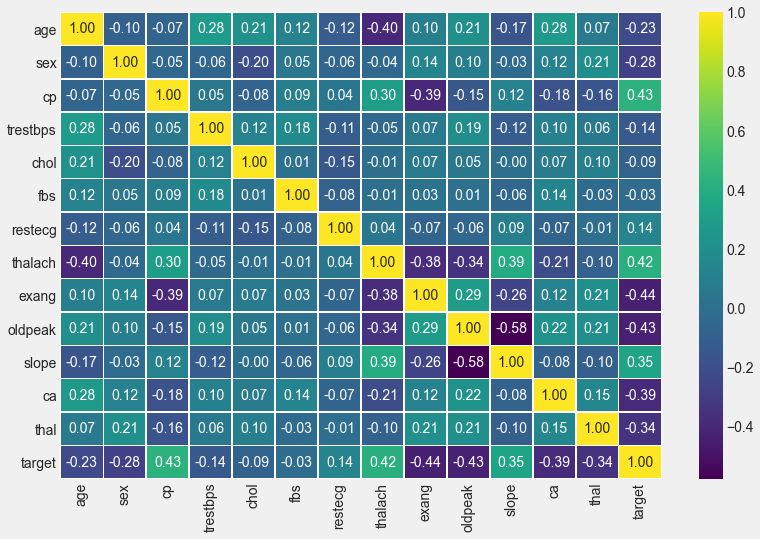

In [113]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="viridis")


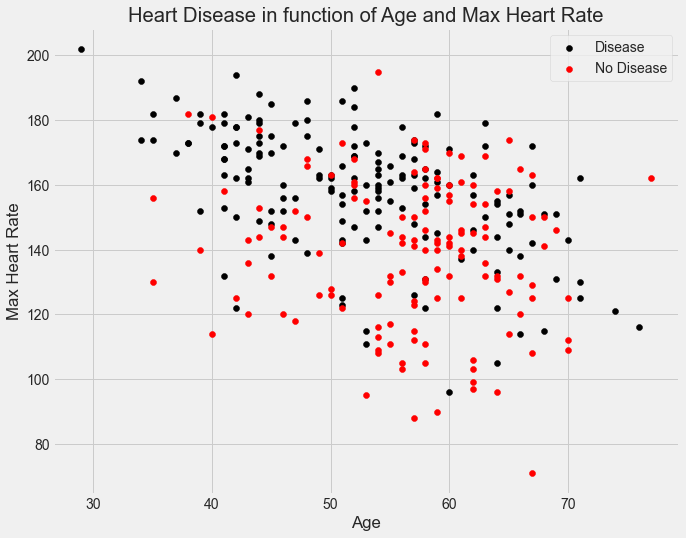

In [114]:
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="black")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="red")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## Data Processing

In [115]:

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

## Applying Algorithms

In [116]:
# creating classification report function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score=[]

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
     if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
        print("Train Result:\n================================================")
        print(clf,":Accuracy: {:.2f} %".format(accuracies.mean()*100))
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        score.append(accuracies.mean()*100)
        
     elif train==False:
         pred = clf.predict(X_test)
         clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
         print("Test Result:\n================================================")        
         print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
         print("_______________________________________________")
         print(f"CLASSIFICATION REPORT:\n{clf_report}")
         print("_______________________________________________")
         print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [117]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


In [119]:
print_score(log_clf, X_train, y_train, X_test, y_test, train=True)
print_score(log_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
LogisticRegression() :Accuracy: 82.12 %
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.875000    0.879032  0.877358    0.877016      0.877282
recall      0.836957    0.908333  0.877358    0.872645      0.877358
f1-score    0.855556    0.893443  0.877358    0.874499      0.877001
support    92.000000  120.000000  0.877358  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 77  15]
 [ 11 109]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.945946   0.796296  0.857143   0.871121      0.871943
recall      0.760870   0.955556  0.857143   0.858213      0.857143
f1-score    0.843373   0.868687  0.857143   0.856030      0.855891
support    46.000000  45.000000  0.857143  91.000000     91.000

In [120]:
print_score(rnd_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rnd_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
RandomForestClassifier() :Accuracy: 83.03 %
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    92.0  120.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 92   0]
 [  0 120]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.857143   0.795918  0.824176   0.826531      0.826867
recall      0.782609   0.866667  0.824176   0.824638      0.824176
f1-score    0.818182   0.829787  0.824176   0.823985      0.823921
support    46.000000  45.000000  0.824176  91.000000     91.000000
_______________________________________________

In [121]:
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
SVC() :Accuracy: 84.00 %
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.963855    0.906977  0.929245    0.935416      0.931660
recall      0.869565    0.975000  0.929245    0.922283      0.929245
f1-score    0.914286    0.939759  0.929245    0.927022      0.928705
support    92.000000  120.000000  0.929245  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  12]
 [  3 117]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.947368   0.811321  0.868132   0.879345      0.880092
recall      0.782609   0.955556  0.868132   0.869082      0.868132
f1-score    0.857143   0.877551  0.868132   0.867347      0.867235
support    46.000000  45.000000  0.868132  91.000000     91.000000
___________

In [122]:
print_score(voting_clf, X_train, y_train, X_test, y_test, train=True)
print_score(voting_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())]) :Accuracy: 84.48 %
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.963855    0.906977  0.929245    0.935416      0.931660
recall      0.869565    0.975000  0.929245    0.922283      0.929245
f1-score    0.914286    0.939759  0.929245    0.927022      0.928705
support    92.000000  120.000000  0.929245  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  12]
 [  3 117]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.947368   0.811321  0.868132   0.879345      0.880092
recall      0.782609   0.955556  0.868132   0.869082      0.868132
f1-score    

In [123]:
log_test_score = accuracy_score(y_test, log_clf.predict(X_test)) * 100
log_accuracies = cross_val_score(estimator = log_clf, X = X_train, y = y_train, cv = 10)
log_train_score=log_accuracies.mean()*100
rnd_test_score = accuracy_score(y_test, rnd_clf.predict(X_test)) * 100
rnd_accuracies = cross_val_score(estimator = rnd_clf, X = X_train, y = y_train, cv = 10)
rnd_train_score=rnd_accuracies.mean()*100
svm_test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
svm_accuracies = cross_val_score(estimator = rnd_clf, X = X_train, y = y_train, cv = 10)
svm_train_score = svm_accuracies.mean()*100
voting_test_score = accuracy_score(y_test, voting_clf.predict(X_test)) * 100
voting_accuracies = cross_val_score(estimator = rnd_clf, X = X_train, y = y_train, cv = 10)
voting_train_score = voting_accuracies.mean()*100

results_df = pd.DataFrame(data=[["Logistic Regression", log_train_score, log_test_score],['Random Forrest',rnd_train_score, rnd_test_score],
                                ['SVM',svm_train_score,svm_test_score],['Voting Classifier',voting_train_score,voting_test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,82.121212,85.714286
1,Random Forrest,84.437229,82.417582
2,SVM,84.935065,86.813187
3,Voting Classifier,84.415584,86.813187
